In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data=pd.read_csv("/content/drive/MyDrive/heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.age.quantile([0.35,0.50,0.80])

,age
0.35,51.0
0.50,55.0
0.80,62.0


figsize=(20,10) znaci deka 20 e width 10 e height

bins se kolku intervali da bidat podleenite podatocite

range e od kolk do klk na x oska

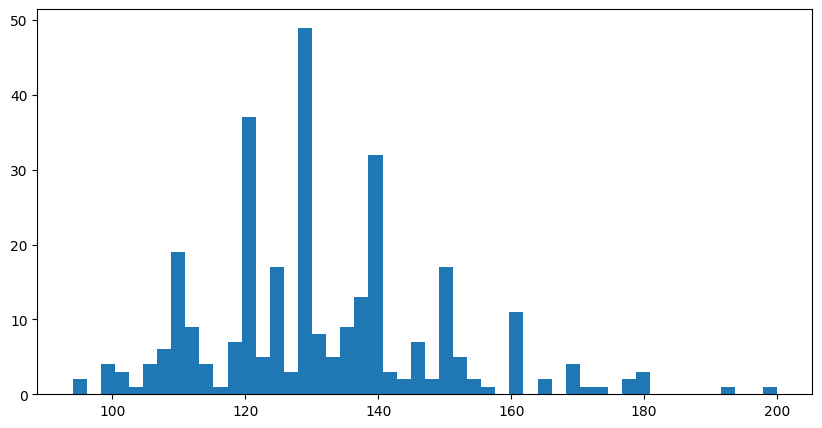

In [20]:
plt.figure(figsize=(10, 5))
plt.hist(data['trestbps'],bins=50)
plt.show()

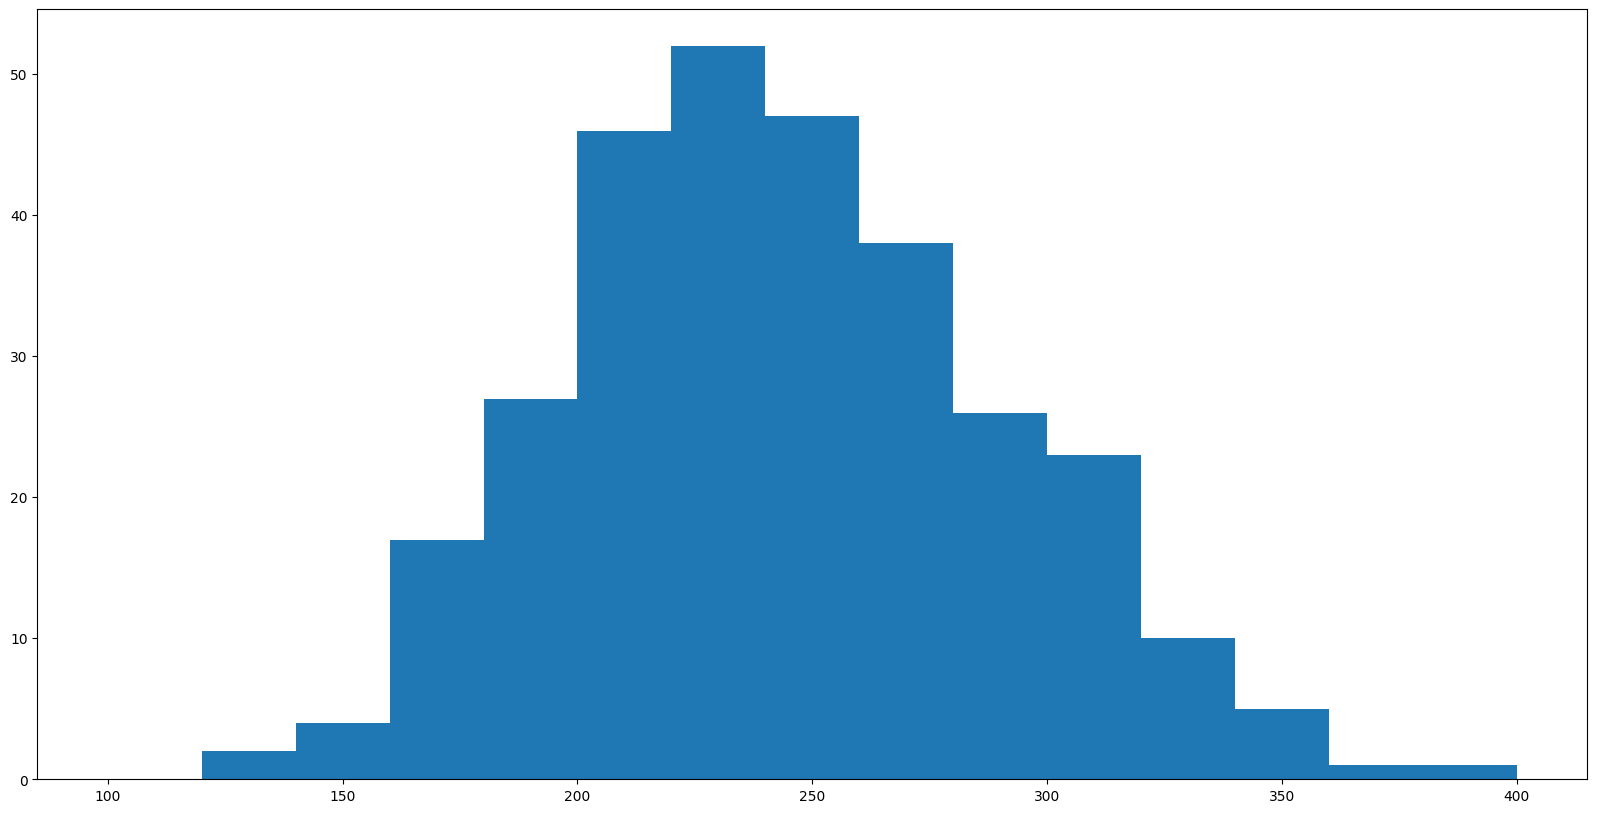

In [25]:
plt.figure(figsize=(20, 10))
plt.hist(data['chol'],bins=15,range=(100,400))
plt.show()

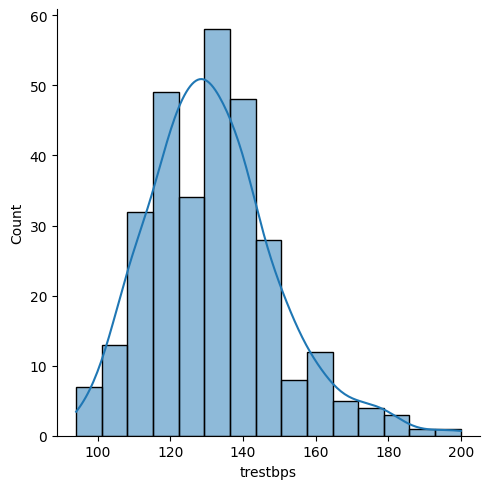

In [26]:
sns.displot(data['trestbps'], kde=True, bins=15)
plt.show()

In [27]:
data['cp']

,cp
0,3
1,2
2,1
3,1
4,0
...,...
298,0
299,3
300,0
301,0


In [29]:
data[['cp','age']]

,cp,age
0,3,63
1,2,37
2,1,41
3,1,56
4,0,57
...,...,...
298,0,57
299,3,45
300,0,68
301,0,57


gi grupira po chestpain i presmetuva prosecna vozrast

In [31]:
cp_age_mean=data.groupby('cp')['age'].mean()

In [32]:
cp_age_mean

,age
cp,
0,55.692308
1,51.360000
2,53.517241
3,55.869565


In [34]:
cp_counts=data.groupby('cp').size()
cp_counts

,0
cp,
0,143
1,50
2,87
3,23


bar sa koriste za kategorii

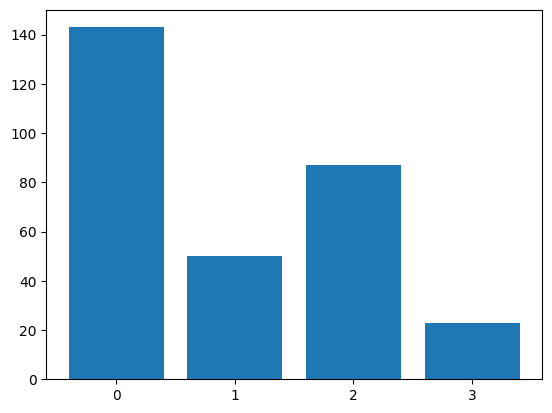

In [37]:
plt.bar(cp_counts.index.astype(str),cp_counts)
plt.show()

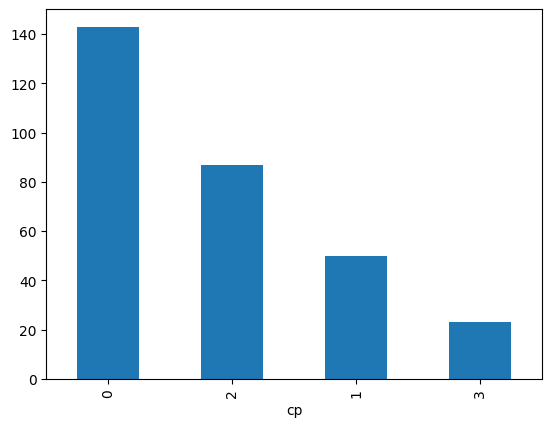

In [38]:
data.cp.value_counts().plot.bar()
plt.show()

box-plotquantiles and IQR (inter-quartal range) of the distributions

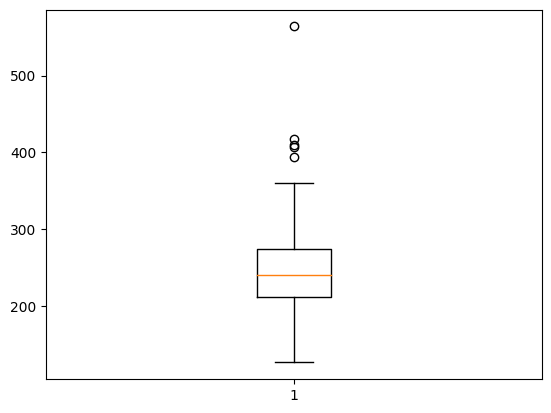

In [39]:
plt.boxplot(data['chol'])
plt.show()

hue='cp': This groups the data by the 'cp' variable and applies different colors to each chest pain type

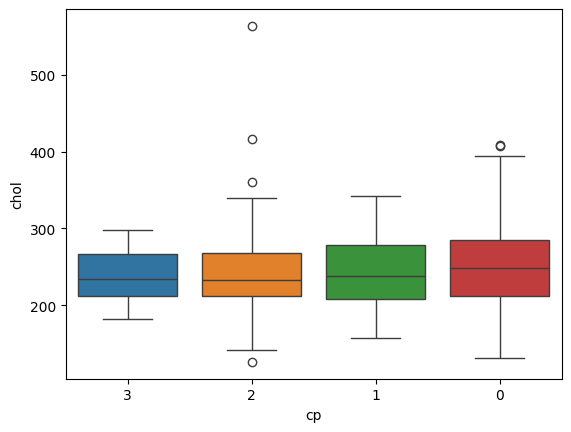

In [40]:
data['cp']=data['cp'].astype(str)
sns.boxplot(data=data,x='cp',y='chol',hue='cp')
plt.show()

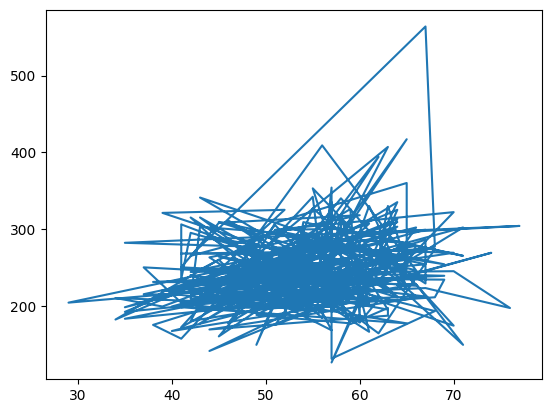

In [41]:
plt.plot(data['age'],data['chol'])

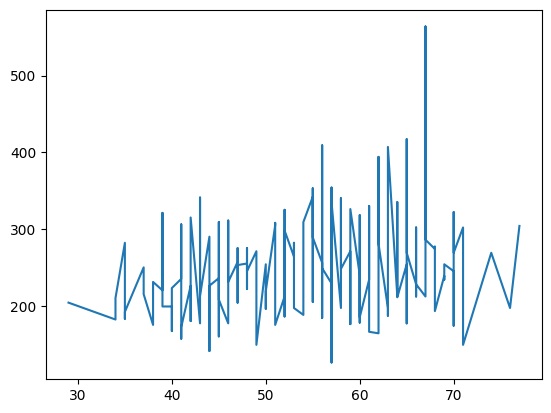

In [42]:
data=data.sort_values('age')
plt.plot(data['age'],data['chol'])

In [43]:
grouped_chol=data.groupby('age')['chol'].mean()
grouped_chol

,chol
age,
29,204.000000
34,196.000000
35,213.750000
37,232.500000
38,193.666667
39,239.750000
40,196.333333
41,220.700000
42,246.750000


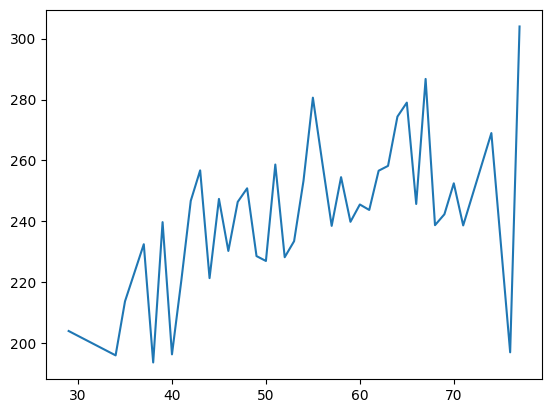

In [44]:
plt.plot(grouped_chol)
plt.show()

scatter plot-Used for visualizing dependencies between continuous variables.


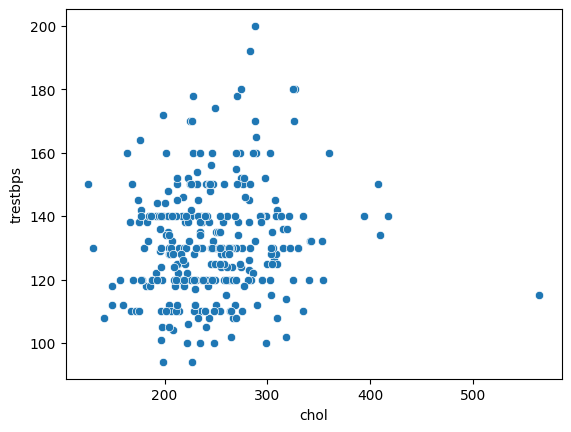

In [45]:
sns.scatterplot(data=data, x='chol', y='trestbps')
plt.show()

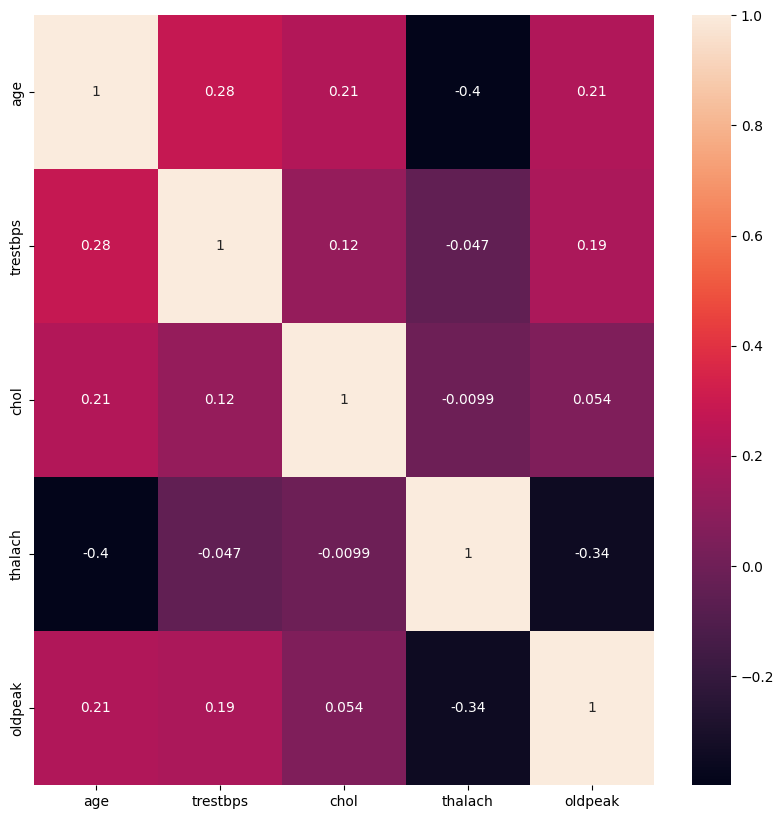

In [47]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.drop(columns=['sex', 'cp', 'target', 'fbs', 'slope', 'restecg', 'exang', 'ca', 'thal']).corr(), annot=True)
# data.corr() returns the correlation between each pair of variables
plt.show()

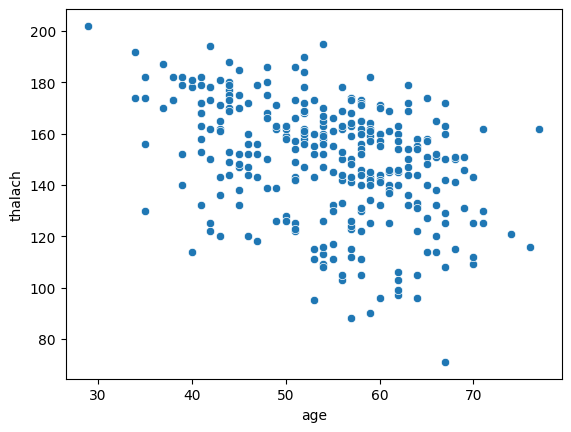

In [48]:
sns.scatterplot(data=data, x='age', y='thalach')
plt.show()

In [55]:
data['age_grouped'] = data['age'] //10*10
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_grouped
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1,20
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1,30
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1,30
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0,30
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,70
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,70
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1,70
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1,70


In [56]:
grouped = data.groupby(['age_grouped', 'cp'])['chol'].mean().reset_index()
grouped

,age_grouped,cp,chol
0,20,1,204.000000
1,30,0,220.500000
2,30,1,201.000000
3,30,2,222.142857
4,30,3,206.500000
5,40,0,245.214286
6,40,1,232.315789
7,40,2,227.000000
8,40,3,235.666667
9,50,0,252.311475


area plot->stacked visualization of multiple continuous variables

In [57]:
px.area(
    grouped,
    x='age_grouped',
    y='chol',
    color = 'cp',
    title='Cholesterol per age and cp',
    width=800,
    height=700
)

.reset_index() converts this into a proper DataFrame, where sex and cp become regular columns, and the size (counts) is added as a new column.

In [59]:
grouped_sex_cp = data.groupby(['sex', 'cp']).size().reset_index()
grouped_sex_cp = grouped_sex_cp.rename(columns={0: 'count'})
grouped_sex_cp


,sex,cp,count
0,0,0,39
1,0,1,18
2,0,2,35
3,0,3,4
4,1,0,104
5,1,1,32
6,1,2,52
7,1,3,19


In [60]:
fig = px.bar(
    grouped_sex_cp,
    x='sex',
    y="count",
    color = 'cp',
    title='Cp per sex',
    width=800,
    height=700
)
fig.show()

In [61]:
fig = px.bar(
    grouped_sex_cp,
    x='sex',
    y="count",
    color = 'cp',
    barmode='group',
    orientation='v',
    title='Cp per sex',
    width=800,
    height=700
)
fig.show()

In [62]:
grouped = data.groupby(['age_grouped', 'cp']).size().reset_index()
grouped = grouped.rename(columns={0: 'count'})
grouped = grouped.sort_values(['age_grouped', 'cp'])
grouped['cp'] = grouped['cp'].astype(int)  # transform to int to get sorted values in plot
grouped['age_grouped'] = grouped['age_grouped'].astype(str)

In [63]:
fig = px.bar(
    grouped,
    x='cp',
    y="count",
    color = 'age_grouped',
    barmode='group',
    orientation='v',
    title='Cp per sex',
    width=800,
    height=700
)
fig.show()

